# Movie reviews - Canvas Discussion 2 
### Heew Kim | Oct 2020

Assessing the effect of altering a regularization parameter, the alpha value in the Ridge Regression model. 

In [1]:
# all imports and magic commands
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_measures import BinaryClassificationPerformance
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using `BinaryClassificationPerformance` v1.02

In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

## MODIFIED feature building and extraction functions 

In [2]:
# function that takes raw data and completes all preprocessing required before model fits
def process_raw_data_modified(fn, my_random_seed, test=False):
    # read and summarize data
    movie_data = pd.read_csv(fn, sep='\t')
    print("movie_data is:", type(movie_data))
    print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
    print("the data types for each of the columns in movie_data:")
    print(movie_data.dtypes, "\n")
    print("the first 10 rows in movie_data:")
    print(movie_data.head(5))
    if (not test):
        print("The rate of 'good' movie reviews in the dataset: ")
        print(movie_data['sentiment'].mean())

    # vectorize Bag of Words from review text; as sparse matrix; added uni- & bigrams; deleted stopwords
    if (not test): # fit_transform()
        hv = HashingVectorizer(n_features=2 ** 16, ngram_range = (1,2), alternate_sign=False)
        X_hv = hv.fit_transform(movie_data.review)
        fitted_transformations.append(hv)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    else: # transform() 
        X_hv = fitted_transformations[0].transform(movie_data.review)
        print("Shape of HashingVectorizer X:")
        print(X_hv.shape)
    
    # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
    if (not test):
        transformer = TfidfTransformer()
        X_tfidf = transformer.fit_transform(X_hv)
        fitted_transformations.append(transformer)
    else:
        X_tfidf = fitted_transformations[1].transform(X_hv)
    
    # create additional quantitative features
    # features from Amazon.csv to add to feature set
    movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
    movie_data['punc_count'] = movie_data['review'].str.count("\.")

    X_quant_features = movie_data[["word_count", "punc_count"]]
    print("Look at a few rows of the new quantitative features: ")
    print(X_quant_features.head(10))
    
    # Combine all quantitative features into a single sparse matrix
    X_quant_features_csr = csr_matrix(X_quant_features)
    X_combined = hstack([X_tfidf, X_quant_features_csr])
    X_matrix = csr_matrix(X_combined) # convert to sparse matrix
    print("Size of combined bag of words and new quantitative variables matrix:")
    print(X_matrix.shape)
    
    # Create `X`, scaled matrix of features
    # feature scaling
    if (not test):
        sc = StandardScaler(with_mean=False)
        X = sc.fit_transform(X_matrix)
        fitted_transformations.append(sc)
        print(X.shape)
        y = movie_data['sentiment']
    else:
        X = fitted_transformations[2].transform(X_matrix)
        print(X.shape)
    
    # Create Training and Test Sets
    # enter an integer for the random_state parameter; any integer will work
    if (test):
        X_submission_test = X
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(movie_data, X_submission_test)
    else: 
        X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = train_test_split(X, y, movie_data, test_size=0.2, random_state=my_random_seed)
        print("Shape of X_train and X_test:")
        print(X_train.shape)
        print(X_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of X_raw_train and X_raw_test:")
        print(X_raw_train.shape)
        print(X_raw_test.shape)
        print('SUCCESS!')
        return(X_train, X_test, y_train, y_test, X_raw_train, X_raw_test)

## MODIFIED training and test sets from function

In [3]:
# create an empty list to store any use of fit_transform() to transform() later
# it is a global list to store model and feature extraction fits
fitted_transformations = []

# CHANGE FILE PATH and my_random_seed number (any integer other than 74 will do):
X_train, X_test, y_train, y_test, X_raw_train, X_raw_test = process_raw_data_modified(fn='/Users/heewoong.kim/Documents/GitHub/ml/ProjectDataset/moviereviews_train.tsv', my_random_seed=99)

print("Number of fits stored in `fitted_transformations` list: ")
print(len(fitted_transformations))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...
The rate of 'good' movie reviews in the dataset: 
0.5
Shape of HashingVectorizer X:
(25000, 65536)
Look at a few rows of the new quantitative features: 
   word_count  punc_count
0         433          20
1         158          16
2         378          20
3         379           8
4         367           9
5

## Fit (and tune) the Ridge Regression Models

In [11]:
from sklearn import linear_model

#set alphas and arrays
alphas = [1, 5e+3, 1e+4, 2e+4, 6e+4, 7e+4, 9e+4, 1.1e+5, 1.2e+5, 3e+5]
rdg={}
rdg_train={}
rdg_test={}

#loop for rdg model fitting/tuning for alphas
for i in range(10):
    rdg[i] = linear_model.RidgeClassifier(alpha=alphas[i])
    rdg[i].fit(X_train, y_train)
    #train set performance
    rdg_train[i] = BinaryClassificationPerformance(rdg[i].predict(X_train), y_train, ('tr'+str(alphas[i])))
    rdg_train[i].compute_measures()
    #test set performance
    rdg_test[i] = BinaryClassificationPerformance(rdg[i].predict(X_test), y_test, ('ts'+str(alphas[i])))
    rdg_test[i].compute_measures()


In [12]:
#print performance measures 

for i in range(10):
    print(rdg_train[i].performance_measures)
    print(rdg_test[i].performance_measures)
    print('* * * * *')


{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'tr1'}
{'Pos': 2512, 'Neg': 2488, 'TP': 2115, 'TN': 2078, 'FP': 410, 'FN': 397, 'Accuracy': 0.8386, 'Precision': 0.8376237623762376, 'Recall': 0.8419585987261147, 'desc': 'ts1'}
* * * * *
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'tr5000.0'}
{'Pos': 2512, 'Neg': 2488, 'TP': 2139, 'TN': 2103, 'FP': 385, 'FN': 373, 'Accuracy': 0.8484, 'Precision': 0.8474643423137876, 'Recall': 0.8515127388535032, 'desc': 'ts5000.0'}
* * * * *
{'Pos': 9988, 'Neg': 10012, 'TP': 9988, 'TN': 10012, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'tr10000.0'}
{'Pos': 2512, 'Neg': 2488, 'TP': 2154, 'TN': 2112, 'FP': 376, 'FN': 358, 'Accuracy': 0.8532, 'Precision': 0.8513833992094861, 'Recall': 0.857484076433121, 'desc': 'ts10000.0'}
* * * * *
{'Pos': 9988, 'Neg': 10012, 

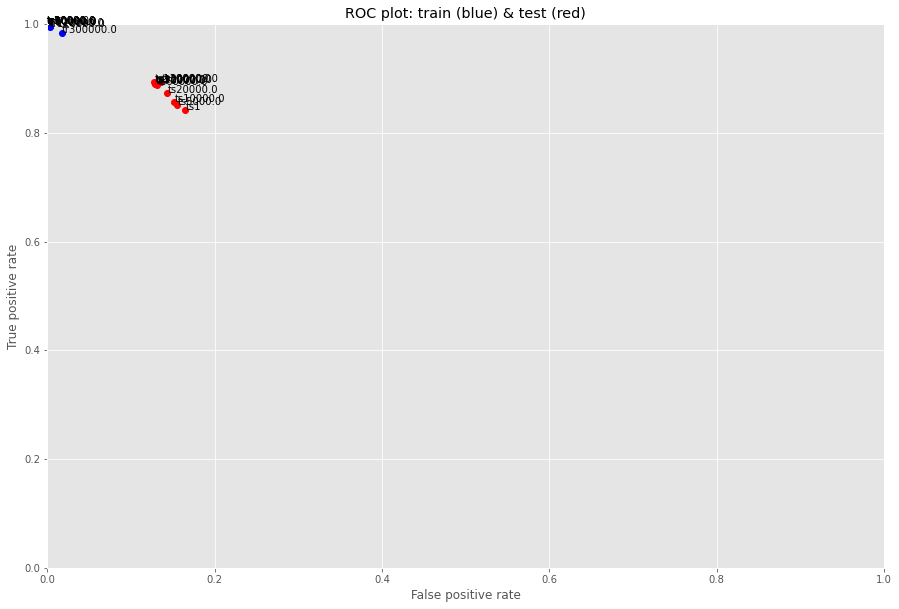

In [13]:
#ROC plot original range
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
for i in range(10):
    plt.plot(rdg_train[i].performance_measures['FP'] / rdg_train[i].performance_measures['Neg'],
             rdg_train[i].performance_measures['TP'] / rdg_train[i].performance_measures['Pos'], 'bo')
    plt.text(rdg_train[i].performance_measures['FP'] / rdg_train[i].performance_measures['Neg'],
             rdg_train[i].performance_measures['TP'] / rdg_train[i].performance_measures['Pos'], rdg_train[i].desc)
    plt.plot(rdg_test[i].performance_measures['FP'] / rdg_test[i].performance_measures['Neg'],
             rdg_test[i].performance_measures['TP'] / rdg_test[i].performance_measures['Pos'], 'ro')
    plt.text(rdg_test[i].performance_measures['FP'] / rdg_test[i].performance_measures['Neg']+0.001,
             rdg_test[i].performance_measures['TP'] / rdg_test[i].performance_measures['Pos'], rdg_test[i].desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: train (blue) & test (red)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

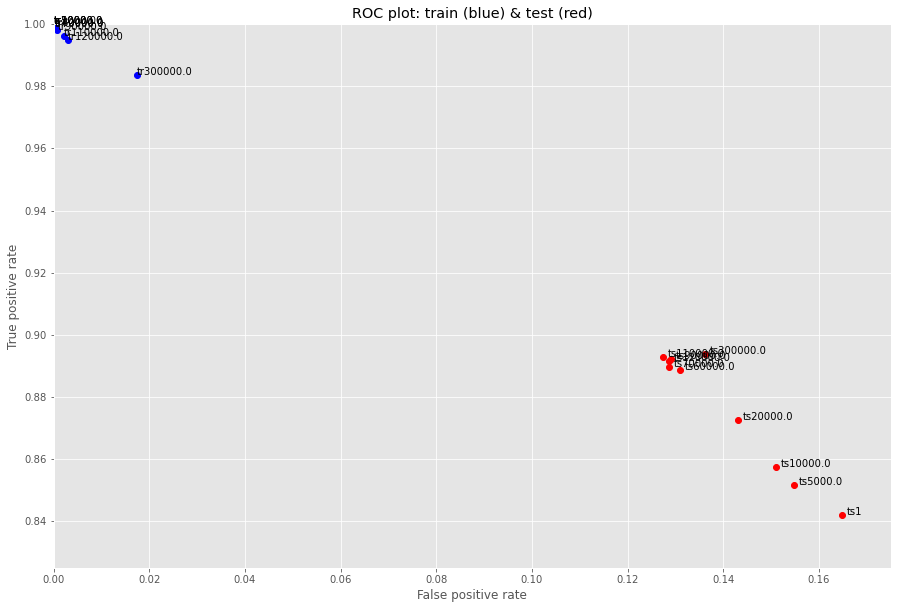

In [14]:
#ROC plot modified range

plt.figure(figsize=(15,10))

for i in range(10):
    plt.plot(rdg_train[i].performance_measures['FP'] / rdg_train[i].performance_measures['Neg'],
             rdg_train[i].performance_measures['TP'] / rdg_train[i].performance_measures['Pos'], 'bo')
    plt.text(rdg_train[i].performance_measures['FP'] / rdg_train[i].performance_measures['Neg'],
             rdg_train[i].performance_measures['TP'] / rdg_train[i].performance_measures['Pos'], rdg_train[i].desc)
    plt.plot(rdg_test[i].performance_measures['FP'] / rdg_test[i].performance_measures['Neg'],
             rdg_test[i].performance_measures['TP'] / rdg_test[i].performance_measures['Pos'], 'ro')
    plt.text(rdg_test[i].performance_measures['FP'] / rdg_test[i].performance_measures['Neg']+0.001,
             rdg_test[i].performance_measures['TP'] / rdg_test[i].performance_measures['Pos'], rdg_test[i].desc)
plt.axis([0, .175, .825, 1])
plt.title('ROC plot: train (blue) & test (red)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


In [15]:
rdg_train_df = []
rdg_test_df = []

for i in range(10):
    rdg_train_df.append(rdg_train[i].performance_measures['Accuracy'])
    rdg_test_df.append(rdg_test[i].performance_measures['Accuracy'])

rdg_df = pd.concat([pd.DataFrame(alphas), pd.DataFrame(rdg_train_df), pd.DataFrame(rdg_test_df)], axis=1)
rdg_df.columns = ['alphas', 'train_accuracy', 'test_accuracy']

rdg_df


,alphas,train_accuracy,test_accuracy
0,1.0,1.00000,0.8386
1,5000.0,1.00000,0.8484
2,10000.0,1.00000,0.8532
3,20000.0,1.00000,0.8648
4,60000.0,0.99960,0.8788
5,70000.0,0.99935,0.8806
6,90000.0,0.99865,0.8816
7,110000.0,0.99700,0.8828
8,120000.0,0.99600,0.8816
9,300000.0,0.98320,0.8788


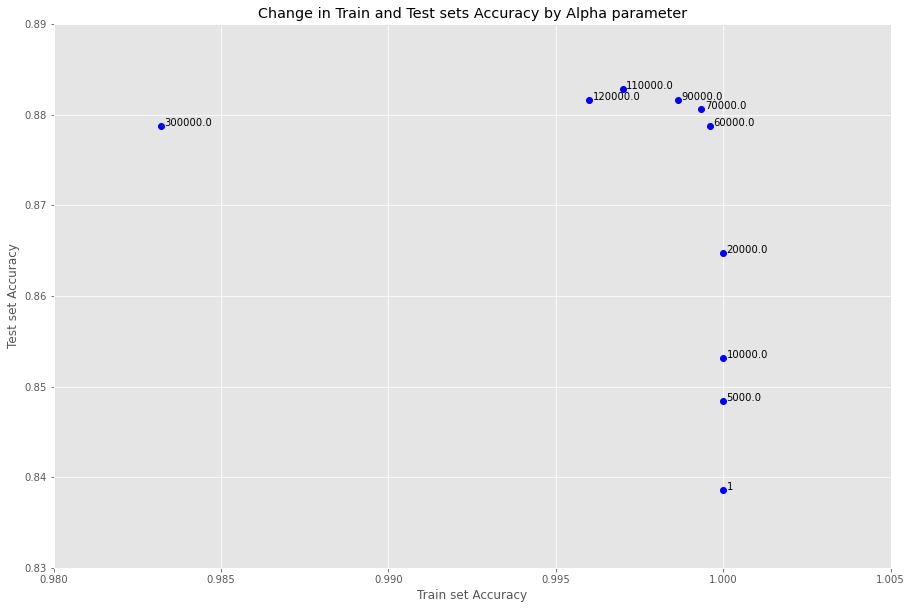

In [19]:
plt.figure(figsize=(15,10))

for i in range(10):
    plt.plot(rdg_train[i].performance_measures['Accuracy'], rdg_test[i].performance_measures['Accuracy'], 'bo')
    plt.text(rdg_train[i].performance_measures['Accuracy']+1e-4, rdg_test[i].performance_measures['Accuracy'], alphas[i])
    
plt.axis([.98, 1.005, .83, .89])
plt.title('Change in Train and Test sets Accuracy by Alpha parameter')
plt.xlabel('Train set Accuracy')
plt.ylabel('Test set Accuracy')
plt.show()



---

# Summary of work and performance  

Based on the modifications made to the feature function in the previous assignment, I assessed the effect of altering the regularization parameter 'alpha' for the Ridge Regression model. The alpha values used at the end were '1, 5e+3, 1e+4, 2e+4, 6e+4, 7e+4, 9e+4, 1.1e+5, 1.2e+5, 3e+5' after testing a few different compositions. Alpha values below 1 had almost no difference to both the performances of the train and test sets. Notable differences in the models, especially in the test set, only started to occur with alpha values beyond 1500. 

**Train set performance by alpha values**: In the assessed models, we see the performance of the train set being more or less consist for alphas between 1 and 60,000 with accuracy rates of 0.99-1.00. However, the train set accuracy rate starts to notably drop from alphas above 90,000. 

**Test set performance by alpha values**: In the test set models, the performance of the models start to notably improve with alpha values above 5,000 (starting slowly from 1500). Improvements happen in both false positive and true positive rates, especially between alphas of 5,000 to 90,000. However, the performance then suddenly starts to drop with alpha values above 110,000 in the case of the train sets. 

**Optimal alpha for performance**: All in all, the optimal alpha value seems to be somewhere between 60,000 and 90,000 (most likely around 70,000), which is the range we see improvements in the test set performance without too much trade-offs to the train set performance.
